In [127]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import heapq as heap


In [167]:
file = 'maze.png'


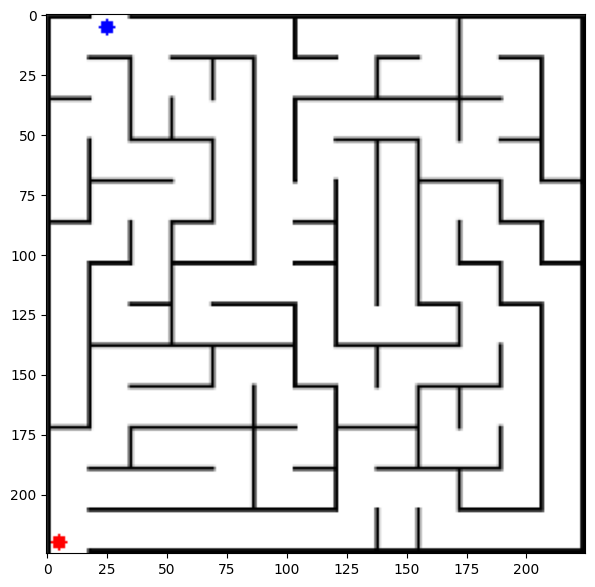

In [168]:
img = cv2.imread(file) # read an image from a file using
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (25,5), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image
img = cv2.imread(file)
plt.show()

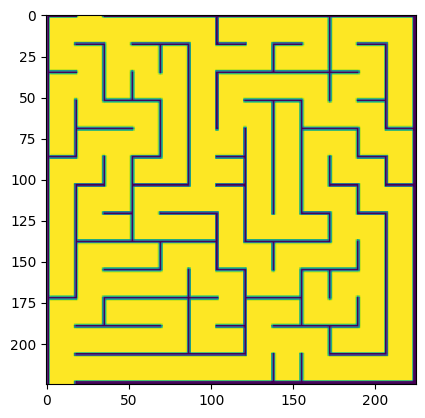

In [169]:
img2 = (img[:,:, 0])
plt.imshow(img2)


In [170]:
img2.shape
print(img2)


[[ 61  39  39 ...  39  39  39]
 [ 39   0   0 ...   0   0   0]
 [ 39   0 255 ... 255  15   0]
 ...
 [ 39   0 255 ... 255  15   0]
 [ 39   0 255 ...  15   0   0]
 [ 39   0 255 ...   0   0   0]]


In [171]:
img = img[:,:,0]

In [176]:
# Your Code Should Be Here
def find_neighboring_pixels(row,column):
    n , m = img.shape
    neighbor = []
    offset = [(0,-1),(0,1),(-1,0),(1,0)]
    for i,j in offset:
        if 0 < row+i < n and 0 < column + j < m:
            if img2[row+i, column + j] > 200:
                neighbor.append((row+i,column+j))
    return neighbor
    


def dijkstra(source,destination):
    distances = {}
    parent = {}
    visited = set()
    heap2 = []
    heap.heappush(heap2,(0,(source)))
    
    distances[source] = 0
    print(heap2) 
    
    while destination not in visited:
        d, node = heap.heappop(heap2)
        while node in visited:
            heap.heappop(heap2)

        visited.add(node)

        neighbor = find_neighboring_pixels(*node)
        for i,j in neighbor:
            if (i,j) not in visited:
                if (i,j) not in distances or distances[(i,j)] > d+1:
                    heap.heappush(heap2, (d+1,((i,j))))
                    distances[(i,j)] = d+1
                    parent[(i,j)] = node
    path = []
    node = destination
    while node != source:
        path.append(node)
        node = parent[node]
    return path + [source]






path = dijkstra((5,25),(220,5))

[(0, (5, 25))]


In [177]:
path

[(220, 5),
 (219, 5),
 (218, 5),
 (217, 5),
 (216, 5),
 (215, 5),
 (214, 5),
 (213, 5),
 (212, 5),
 (211, 5),
 (210, 5),
 (209, 5),
 (208, 5),
 (208, 6),
 (208, 7),
 (208, 8),
 (208, 9),
 (208, 10),
 (208, 11),
 (208, 12),
 (208, 13),
 (208, 14),
 (208, 15),
 (208, 16),
 (208, 17),
 (208, 18),
 (208, 19),
 (208, 20),
 (208, 21),
 (208, 22),
 (208, 23),
 (208, 24),
 (208, 25),
 (208, 26),
 (208, 27),
 (208, 28),
 (208, 29),
 (208, 30),
 (208, 31),
 (208, 32),
 (208, 33),
 (208, 34),
 (208, 35),
 (208, 36),
 (208, 37),
 (208, 38),
 (208, 39),
 (208, 40),
 (208, 41),
 (208, 42),
 (208, 43),
 (208, 44),
 (208, 45),
 (208, 46),
 (208, 47),
 (208, 48),
 (208, 49),
 (208, 50),
 (208, 51),
 (208, 52),
 (208, 53),
 (208, 54),
 (208, 55),
 (208, 56),
 (208, 57),
 (208, 58),
 (208, 59),
 (208, 60),
 (208, 61),
 (208, 62),
 (208, 63),
 (208, 64),
 (208, 65),
 (208, 66),
 (208, 67),
 (208, 68),
 (208, 69),
 (208, 70),
 (208, 71),
 (208, 72),
 (208, 73),
 (208, 74),
 (208, 75),
 (208, 76),
 (208, 77

In [150]:
print(find_neighboring_pixels(5,25))
dijkstra((5,25),(220,5))



[(5, 24), (5, 26), (4, 25), (6, 25)]
[(0, (5, 25))]


IndexError: list index out of range

In [178]:
def drawPath(img,path, thickness=1):
    '''path is a list of (x,y) tuples'''
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        cv2.line(img,(y0,x0),(y1,x1),(255,0,0),thickness)
        x0,y0=vertex

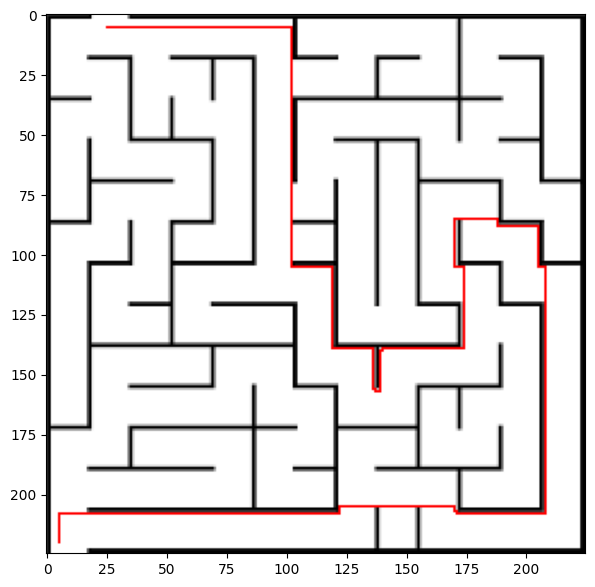

In [180]:
img = cv2.imread(file)
drawPath(img,path)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image on the screen 
plt.show()